# Introduction to Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize or to reduce the number of variables in a dataset while preserving the variation in the dataset as much as possible. It does this by creating new variables called principal components that are linear combinations of the original variables. The first principal component accounts for as much of the variation in the data as possible, and each succeeding component accounts for as much of the remaining variation as possible.

PCA is closely related to **singular value decomposition (SVD)**. SVD is a more general method of understandig the basis and is used in a wide range of applications including compressing, denoising, and data reduction. Its ability to handle different types of data makes it a versatile tool in the field of data science. If you are further interested and want to know more about some applications (especially for dimensionality reduction) you can check the following Resources from Steven Brunton: http://databookuw.com/page-2/page-4/ (Youtube playlist https://www.youtube.com/watch?v=gXbThCXjZFM&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv and his book (Data Driven Science & Engineering Machine Learning, Dynamical Systems, and Control from Steven Brunton and J. Nathan Kutz) here: http://databookuw.com/databook.pdf where Chapter 1 is about SVD and Section 1.5 is about PCA).

## Brief Repitition of Singular Value Decomposition (SVD)

Assume we have a dataset of many Measurements stored in a matrix $X \in \mathbb{C}^{n \times m}$, where $m$ is the number of measurements and $n$ is the number of features. For example, we could have $m$ measurements of the position of a mass on a spring over time, where each measurement is a vector of $n$ features. We can write this as:
$$ 
X = \begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1m} \\
x_{21} & x_{22} & \dots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \dots & x_{nm} \\
\end{bmatrix}
$$

where each measurement is $x_i \in \mathbb{C}^n$ and the whole dataset is $X \in \mathbb{C}^{n \times m}$. We can think of each measurement as a point in an $n$-dimensional space. For example, if we have $n=2$ features, we could plot each measurement as a point in a 2D space. If we have $n=3$ features, we could plot each measurement as a point in a 3D space. If we have $n>3$ features, we cannot plot each measurement as a point in a 3D space, but we can still think of each measurement as a point in an $n$-dimensional space. 

We can transform our measurements using the Singular Value Decomposition (SVD), which is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides the basis for many practical applications such as signal processing, image processing, and data reduction.

For our given $n \times m$ matrix $X$, the SVD is written as:
$$
X = UΣV^*
$$
Where:
- $U$ is an unitary $n \times n$ matrix, the columns of which are the eigenvectors of $XX^*$
- $Σ$ is an $n \times m$ diagonal matrix (real, non-negative entries on the diagonal and zeros off the diagonal), the diagonal elements of which are the square roots of the eigenvalues of $XX^*$ or $X^*X$.
- $V*$ (the conjugate transpose of V) is an unitary $m \times m$ matrix, the columns of which are the eigenvectors of $X^*X$

Note that $*$ is the conjugate transpose of a matrix. For a real matrix, the conjugate transpose is the same as the transpose $X^* = X^T$. For a complex matrix, the conjugate transpose is the transpose of the complex conjugate of the matrix. A square matrix $U$ is unitary if $UU^* = U^*U = I$.

The diagonal elements of Σ are known as the singular values of X. The columns of U and the columns of V* are called the left-singular vectors and right-singular vectors of X, respectively.


## PCA in a Nutshell

PCA is one of the central applications of the SVD, where we can transform high-dimensional correlated data. In PCA we pre-processes the data by mean subtraction and setting the variance to unity before performing the SVD. The geometry of the resulting coordinate system is determined by principal components (PCs) that are uncorrelated (orthogonal) to each other, but have maximal correlation with the measurements. 

We again consider a dataset of many (real valued) Measurements stored in a matrix $X \in \mathbb{R}^{m \times n}$, where $n$ is the number of measurements and $m$ is the number of features (please note that we changed the dimensions compared to the SVD section). We can write this as:
$$ 
X = \begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1n} \\
x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \dots & x_{mn} \\
\end{bmatrix}
$$

where each measurement is $x_i \in \mathbb{R}^m$ and the whole dataset is $X \in \mathbb{R}^{m \times n}$.

First we compute the mean of $X$ for each measurement: 
$$\bar{x}_j = \frac{1}{n}\sum_{i=1}^n x_{ij}$$

and construct the mean Matrix $X_M$:
$$X_M = \begin{bmatrix}
\bar{x}_1 & \bar{x}_2 & \dots & \bar{x}_n \\
\bar{x}_1 & \bar{x}_2 & \dots & \bar{x}_n \\
\vdots & \vdots & \ddots & \vdots \\
\bar{x}_1 & \bar{x}_2 & \dots & \bar{x}_n \\
\end{bmatrix}$$

Then we subtract the mean from each measurement resulting in the mean substracted data $B$:
$$B = \frac{1}{\sqrt{n-1}} (X - X_M)^T$$

Using the mean subtracted data $B$ we compute the covariance matrix of $B$:

$$C_X = B^TB$$

The principal components of $X$ are also the eigenvectors of $C_X$. Hence, if we calculate the SVD of $B$, the columns of matrix $V$ contain the eigenvectors of $B^TB = C_X$ (see the description of $V$ in the SVD section). Therefore, the columns of $V$ are the principal components of $X$. 

In summary we can write the following pseudo code for PCA:
```python
# PCA - Perform PCA using SVD.
# Input: data - MxN matrix of input data (M dimensions, N trials)
[M,N] = size(data)
mean_x = mean(X, axis=2)
data = data - repmat(mean_x,1,N)
B = data* / sqrt(N-1)
[u,S,PC] = svd(B)

# calculate the variances
S = diag(S)
V = S .* S

# project the original data
signals = PC’ * data
```

## Example: Measuring a spring-mass system using cameras

We will use an example from "A Tutorial on Principal Component Analyses" by Jonathon Shlens (https://arxiv.org/pdf/1404.1100.pdf) to illustrate the use of PCA. 

Consider the following example. We have an ideal spring-mass system of a ball with mass m attached to a massless, frictionless spring. The spring is attached to a wall and the ball is free to move in the horizontal direction. The ball is initially at rest at the equilibrium position of the spring. We then pull the ball to the right and release it. The ball will then oscillate back and forth. We are interested in measuring the position of the mass over time. We have three video cameras which we can use to track the position of the mass (see figure below).

![Spring-mass system](spring_mass_system.png)

Since we do not know anything about the system, we did not position the cameras in a position which would allow us to directly measure the position of the mass. Instead, we positioned the cameras in arbitrary angles. By doing this we can only measure the position of the mass in the x- and y-directions of each camera frame. Hence we want to use the measured camera positions to calculate the position of the mass in its x-direction. How do we get from this data set to a simple equation of x?

First let start with the problem and the data.


In [2]:
import Pkg
Pkg.generate("PCA")
Pkg.activate("PCA")
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
Pkg.add("Statistics")
Pkg.add("Random")
Pkg.add("Revise")

  Generating  project PCA:
    PCA/Project.toml
    PCA/src/PCA.jl
  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Lectures/Vorlesung - Ingenieurwissenschaftliche Grundlagen 3 (Numerische Methoden)/auxme_numerik_2024/Excercise/Exercise 12/PCA`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed libaom_jll ──── v3.12.1+0
   Installed Wayland_jll ─── v1.24.0+0
   Installed libvorbis_jll ─ v1.3.8+0
   Installed JLLWrappers ─── v1.7.1
   Installed Plots ───────── v1.40.17
   Installed ColorSchemes ── v3.30.0
      Compat entries added for Plots
    Updating `~/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Lectures/Vorlesung - Ingenieurwissenschaftliche Grundlagen 3 (Numerische Methoden)/auxme_numerik_2024/Excercise/Exercise 12/PCA/Project.toml`
  [91a5bcdd] + Plots v1.40.17
    Updating `~/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Lectures/Vorlesung - Ingenieurwissenschaftliche Grundlagen 3

In [3]:
import Pkg
Pkg.activate("PCA")
using Revise
include("./SpringMass.jl") # this file implements the generation of our spring-mass toy problem 
using .SpringMass
using Statistics, LinearAlgebra, Random, Plots

  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Lectures/Vorlesung - Ingenieurwissenschaftliche Grundlagen 3 (Numerische Methoden)/auxme_numerik_2024/Excercise/Exercise 12/PCA`
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: wrong dep version loaded (2), wrong source (6), dep missing source (4))
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (10))


Let's generate our dataset and take a first look at it:

In [4]:
amplitude = 2.0 # amplitude of the motion
X, x_true, y_true = generate_dataset(amplitude)

([1.6098679745689513 1.1926584496507286 … 0.3158093197508946 1.9707191820874075; 1.807999850837035 1.2831706327058465 … 0.5462103937384623 1.4645377300741393; … ; 1.2330084681409406 0.34963089798765895 … 0.5641652696241063 1.547078785187211; 1.7128860806688178 1.0395842367452093 … 0.4637464070486352 1.7351084324600963], [2.0, 1.9960534568565431, 1.9842294026289558, 1.9645745014573774, 1.9371663222572622, 1.902113032590307, 1.859552971776503, 1.809654104932039, 1.7526133600877272, 1.6886558510040302  …  1.6886558510040273, 1.7526133600877276, 1.809654104932036, 1.8595529717764974, 1.9021130325903046, 1.9371663222572653, 1.964574501457378, 1.9842294026289553, 1.9960534568565433, 2.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

So what do we have here? 

The dataset X is a matrix where each row corresponds to a different time step and each column corresponds to a different measurement. The measurements are the x and y coordinates of the ball's position as recorded by three different cameras. The cameras are not aligned with the true x and y axes, but instead have their own coordinate systems that are rotated at arbitrary angles with respect to the true axes.

Before we take a look at the data we plot the true motion of the ball we want to measure. This will give us an idea what we expect to see in the data.

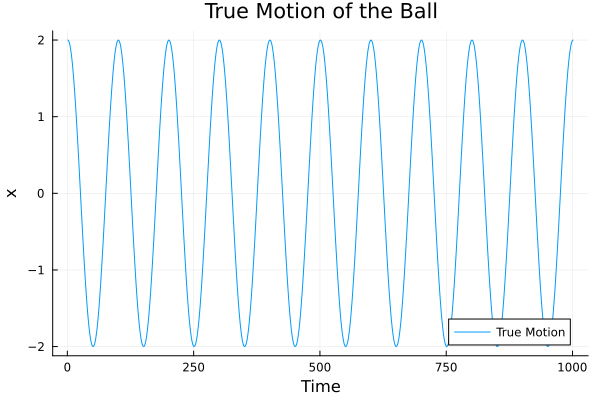

In [5]:
# Plot the "true" motion
p = plot(x_true, label="True Motion", title="True Motion of the Ball", xlabel="Time", ylabel="x")

Now let's take a look at the data. We have three cameras which measure the position of the ball in the x- and y-directions. We can plot the position of the ball in the x- and y-directions for each camera:

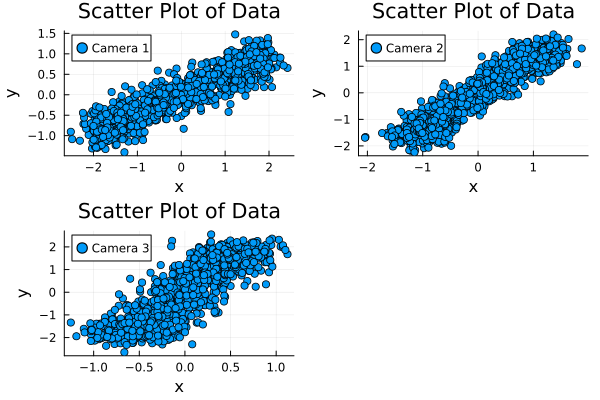

In [6]:
# Scatter Plot the 2-dim data
p1 = scatter(X[:, 1], X[:, 2], label="Camera 1")
p2 = scatter(X[:, 3], X[:, 4], label="Camera 2")
p3 = scatter(X[:, 5], X[:, 6], label="Camera 3")
plot(p1, p2, p3, title="Scatter Plot of Data", xlabel="x", ylabel="y")

Here's a breakdown of the columns in X:
- Columns 1 and 2: The x and y coordinates of the ball's position as recorded by camera 1 (Plot 1).
- Columns 3 and 4: The x and y coordinates of the ball's position as recorded by camera 2 (Plot 2).
- Columns 5 and 6: The x and y coordinates of the ball's position as recorded by camera 3 (Plot 3).

So these 6 columns are the measurements we have. Where each measurement $x_{i}$ at time step $i$ can be viewed as: 
$$
x_{i} = \begin{bmatrix}
x_{a} \\
y_{a} \\
x_{b} \\
y_{b} \\
x_{c} \\
y_{c} 
\end{bmatrix}
$$

Each row in X represents a different time step $i$. The time steps are evenly spaced and cover the entire duration of the ball's motion. We simulated for 10 seconds with a time step of 0.01 seconds, so there are 1000 rows in X.

The values in X are real numbers that represent the position of the ball in the coordinate system of each camera. These values have been corrupted by Gaussian noise to simulate measurement error.

In order to analyze this dataset, we will perform Principal Component Analysis (PCA) to find the directions of greatest variance in the data. These directions, known as the principal components, can reveal the true motion of the ball, as well as the relationships between the different measurements.

## PCA on the spring-mass system 
Now let us compute the principal components of our data set. We will preprocess the data and use the ```eigen()``` function of the LinearAlgebra package to compute the principal components as explained above. 

In [7]:
# Perform PCA
μ = mean(X, dims=1)  # compute the mean
X_centered = X .- μ  # center the data
Σ = X_centered' * X_centered / (size(X, 1) - 1)  # compute the covariance matrix
λ, V = eigen(Σ)  # compute the eigenvalues and eigenvectors

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
6-element Vector{Float64}:
 0.05449609196575315
 0.057451142387664605
 0.060767197901218234
 0.06439055245589331
 0.06778826288474825
 6.017518027980509
vectors:
6×6 Matrix{Float64}:
  0.151553   -0.348543    0.534685  -0.42636     0.341688   -0.520699
  0.0832535   0.727568   -0.274497  -0.571147    0.0498465  -0.244276
  0.456566    0.121181    0.496537  -0.216812   -0.605264    0.341996
 -0.357999    0.381516    0.51767    0.0266434   0.486842    0.469654
 -0.79446    -0.0664989   0.144784  -0.240119   -0.505727   -0.173297
  0.0481327   0.429536    0.321355   0.621799   -0.147125   -0.549212

In [8]:
# The principal components are given by the eigenvectors
PCs = V

6×6 Matrix{Float64}:
  0.151553   -0.348543    0.534685  -0.42636     0.341688   -0.520699
  0.0832535   0.727568   -0.274497  -0.571147    0.0498465  -0.244276
  0.456566    0.121181    0.496537  -0.216812   -0.605264    0.341996
 -0.357999    0.381516    0.51767    0.0266434   0.486842    0.469654
 -0.79446    -0.0664989   0.144784  -0.240119   -0.505727   -0.173297
  0.0481327   0.429536    0.321355   0.621799   -0.147125   -0.549212

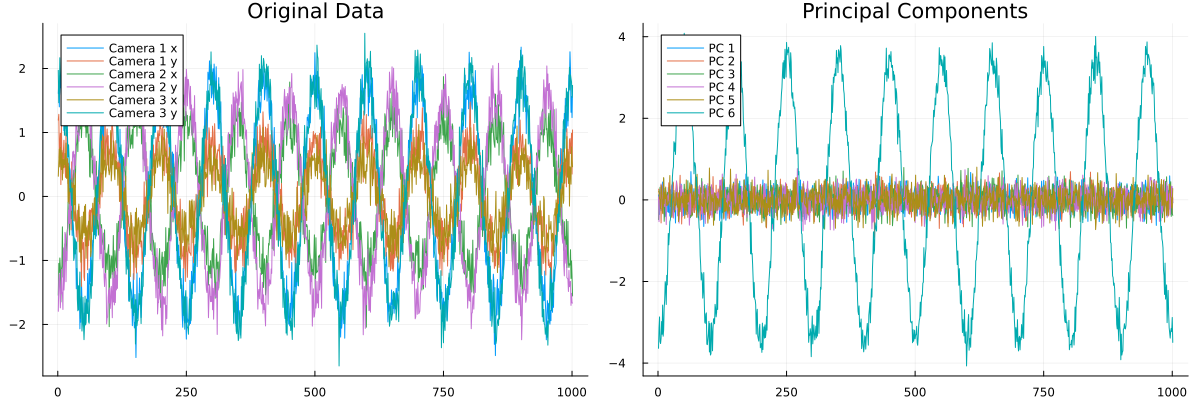

In [9]:
# Plot the original data and the principal components
p1 = plot(X, label=["Camera 1 x" "Camera 1 y" "Camera 2 x" "Camera 2 y" "Camera 3 x" "Camera 3 y"], title="Original Data")
p2 = plot(X * PCs, label=["PC 1" "PC 2" "PC 3" "PC 4" "PC 5" "PC 6"], title="Principal Components")
plot(p1, p2, layout=(1, 2), size=(1200, 400), legend=:topleft)

### Things we can do with PCA

1. Correlation: If your data variables are correlated, PCA can help identify these correlations. Highly correlated variables will contribute to the same principal component.

2. Dimensionality Reduction: If your data has many dimensions, PCA can be used to reduce its dimensionality while preserving as much of the data's variation as possible. The reduced-dimension data can be easier to analyze and visualize.

3. Variance Explained: The eigenvalues of the covariance matrix in PCA represent the amount of variance explained by each principal component. The first principal component explains the most variance, the second principal component explains the second most, and so on. By examining these eigenvalues, you can get a sense of how much of the total variance in your data is captured by each principal component.

4. Outlier Detection: Outliers are observations that are far from the main cluster of data points. PCA can help detect outliers by looking at the principal components that explain the most variance. Outliers will often show up as extreme values on the principal components.

In [10]:
# combine the transformed data into a matrix
X_projected = X * PCs

1001×6 Matrix{Float64}:
  0.124862    0.260359    -0.483182     0.0688942    0.220574    -3.63751
  0.0140027   0.264003    -0.0410161   -0.532724     0.178294    -3.13381
 -0.357923   -0.00752172  -0.00370568   0.116113     0.0277044   -2.86842
  0.17962     0.149626     0.310035     0.141712    -0.00385249  -3.47039
 -0.0622712   0.108328    -0.082517    -0.0712575   -0.218011    -3.52143
 -0.267288   -0.564955     0.0154771    0.391114     0.365472    -3.39023
 -0.0394652   0.339858    -0.0329569   -0.189858     0.287859    -2.98169
 -0.117878   -0.0852264    0.127559     0.11054     -0.109721    -3.29324
  0.437532    0.0638011    0.0081515    0.0217056   -0.329786    -2.57871
 -0.037388   -0.343298    -0.0758135    0.385267    -0.102463    -3.34171
 -0.185341    0.221509     0.524777     0.148177     0.547629    -3.18586
 -0.17358     0.100902    -0.525562    -0.0581333   -0.0946353   -2.64753
 -0.164369   -0.416706    -0.247451    -0.165818     0.179126    -2.46211
  ⋮           

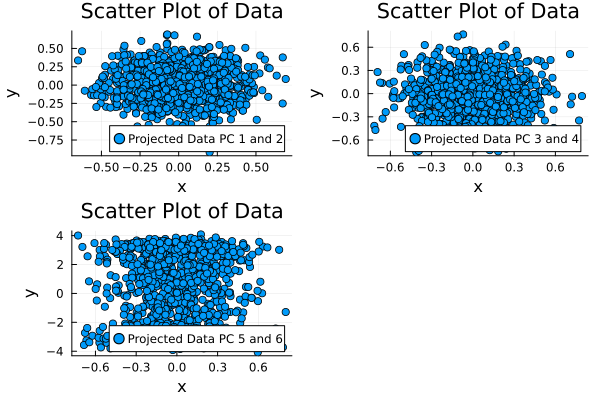

In [11]:
# Scatter Plot the 2-dim data
p1 = scatter(X_projected[:, 1], X_projected[:, 2], label="Projected Data PC 1 and 2") 
p2 = scatter(X_projected[:, 3], X_projected[:, 4], label="Projected Data PC 3 and 4")
p3 = scatter(X_projected[:, 5], X_projected[:, 6], label="Projected Data PC 5 and 6")
plot(p1, p2, p3, title="Scatter Plot of Data", xlabel="x", ylabel="y")


**Correlation** We can already see that the data is highly correlated when we look at the scatter plots of the data and compate this to the transformed data. We can also see this by looking at the correlation matrix of the data: 

In [12]:
# correlation matrix of our data
cor(X)

6×6 Matrix{Float64}:
  1.0        0.909726  -0.94163   -0.958103   0.851169   0.964513
  0.909726   1.0       -0.88663   -0.904809   0.805137   0.906577
 -0.94163   -0.88663    1.0        0.935434  -0.82033   -0.942281
 -0.958103  -0.904809   0.935434   1.0       -0.854068  -0.9617
  0.851169   0.805137  -0.82033   -0.854068   1.0        0.853494
  0.964513   0.906577  -0.942281  -0.9617     0.853494   1.0

We can also look at the correlation matrix of the data transformed by PCA:

In [13]:
# correlation matrix of the transformed data
cor(X_projected)

6×6 Matrix{Float64}:
  1.0          -4.64295e-16  3.02799e-15  …   3.13449e-15  -1.85149e-15
 -4.64295e-16   1.0          1.00047e-14     -4.54365e-15   2.32175e-15
  3.02799e-15   1.00047e-14  1.0              1.48591e-15   2.02435e-15
  5.32648e-15   3.21219e-15  8.45899e-15      1.19647e-15   3.79972e-15
  3.13449e-15  -4.54365e-15  1.48591e-15      1.0          -8.87923e-16
 -1.85149e-15   2.32175e-15  2.02435e-15  …  -8.87923e-16   1.0

**Dimensionality Reduction** We can reduce the two dimensional data to one dimension using PCA. This is done by projecting the data onto the first principal component as we have done above.

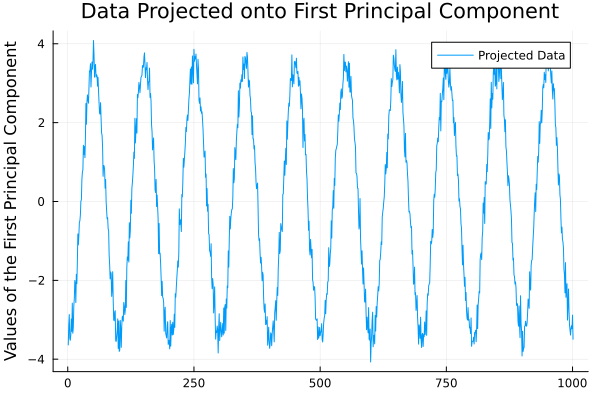

In [14]:
reduced_data = X_projected[:, end] # reduce the data to one dimension

# Plot the reduced data
plot(reduced_data, label="Projected Data", title="Data Projected onto First Principal Component", ylabel="Values of the First Principal Component")

We can actually see that we are able to retrieve the true motion of the ball by looking at the first principal component. The first principal component is a linear combination of the original measurements. We can see the coefficients of this linear combination by looking at the first row of the matrix V. We are actually able to do this since the ball is moving in a straight line. If the ball was moving in a more complicated way, we would not be able to recover the true motion of the ball by looking at the first principal component, since the first principal component is a linear combination of the original measurements. 

**Variance Explained:** We can combine the explained variance with the data to see how much of the variance in the data is explained by each principal component. 

Variance explained by each principal component: [0.008619510751582694, 0.00908690369600046, 0.009611395914082499, 0.0101844928539593, 0.010721900226045437, 0.9517757965583297]


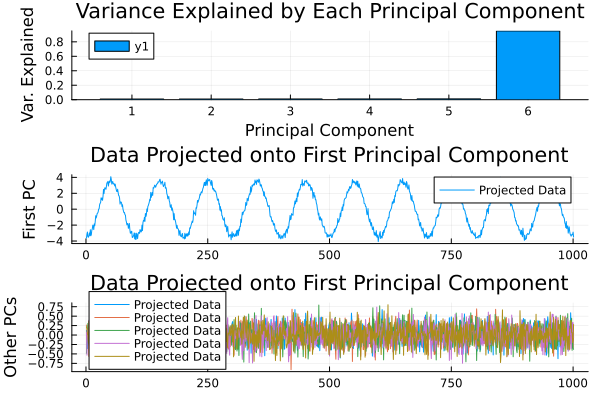

In [15]:
# Compute the variance explained by each principal component
var_explained = λ ./ sum(λ)

println("Variance explained by each principal component: ", var_explained)

# Plot the variance explained
p1 = bar(1:length(var_explained), var_explained, title="Variance Explained by Each Principal Component", xlabel="Principal Component", ylabel="Var. Explained")

# Plot the projected data
p2 = plot(X_projected[:, end], label="Projected Data", title="Data Projected onto First Principal Component", ylabel="First PC")

p3 = plot(X_projected[:, 1:end-1], label="Projected Data", title="Data Projected onto First Principal Component", ylabel="Other PCs")

# Display the plots
plot(p1, p2, p3, layout=(3, 1))

## Task 1: Spring Mass with more noise in the data

Now let's take a look at what happens when we increase the amount of noise in the data. We will increase the standard deviation of the noise from 0.25 to 2.0. This will make the data much more noisy and harder to analyze. This noise could be viewed as inaccurate measurements for example by shaking of the cameras. Load the following data set and see what the PCA tells you about the system: 

In [16]:
amplitude = 2.0 # amplitude of the motion
noise_level = 2.0 # noise level of the data, this can be viewed as chaking of the cameras
X, x_true, y_true = generate_dataset(amplitude, noise_level)

([3.6320260950382544 -0.6155443340885517 … -0.8780009941274192 -0.04821139505389227; 1.3018350188174126 2.8777876527434745 … 2.3387121857652877 0.34467353614892926; … ; 3.4069509120792265 -1.1626122760334243 … 0.6305979973882332 6.39688735229826; 3.893937056594884 0.12210296125668452 … 1.0491057249738533 0.48294968442337627], [2.0, 1.9960534568565431, 1.9842294026289558, 1.9645745014573774, 1.9371663222572622, 1.902113032590307, 1.859552971776503, 1.809654104932039, 1.7526133600877272, 1.6886558510040302  …  1.6886558510040273, 1.7526133600877276, 1.809654104932036, 1.8595529717764974, 1.9021130325903046, 1.9371663222572653, 1.964574501457378, 1.9842294026289553, 1.9960534568565433, 2.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

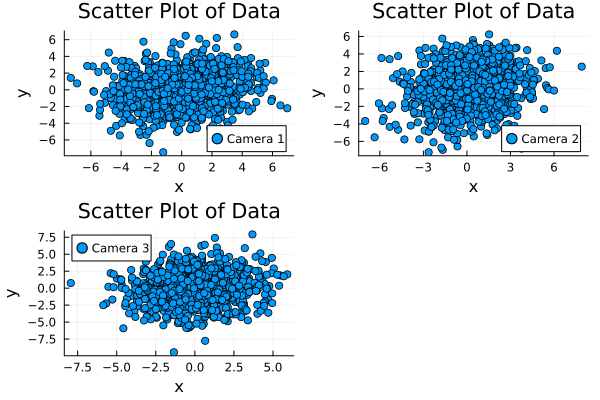

In [17]:
# Scatter Plot the 2-dim data
p1 = scatter(X[:, 1], X[:, 2], label="Camera 1")
p2 = scatter(X[:, 3], X[:, 4], label="Camera 2")
p3 = scatter(X[:, 5], X[:, 6], label="Camera 3")
plot(p1, p2, p3, title="Scatter Plot of Data", xlabel="x", ylabel="y")

Use PCA to analyze the data:

## Task 2: Spring Mass with deviations in the y direction

Now the mass is released off-center so as to produce motion in the $y$ plane as well as the $x$ direction. Load the following data set and see what the PCA tells you about the system: 

In [18]:
amplitude = 2.0 # amplitude of the motion
noise_level = 0.25 # noise level of the data, this can be viewed as chaking of the cameras
amplitude_deviation = 1.0 # deviation in the y direction
X, x_true, y_true = generate_dataset(amplitude, noise_level, amplitude_deviation)

([1.3827761231988178 0.7065570764572923 … 0.6237230411910013 2.031095293922461; 1.923391341853162 0.976645956762858 … 0.3014019080349056 2.0129919173132387; … ; 1.252070450292773 0.9947816930726633 … 0.33212832860858066 1.677302791306833; 2.126945556166801 0.6660424755467511 … 1.1038996602188473 1.740571996784814], [2.0, 1.9960534568565431, 1.9842294026289558, 1.9645745014573774, 1.9371663222572622, 1.902113032590307, 1.859552971776503, 1.809654104932039, 1.7526133600877272, 1.6886558510040302  …  1.6886558510040273, 1.7526133600877276, 1.809654104932036, 1.8595529717764974, 1.9021130325903046, 1.9371663222572653, 1.964574501457378, 1.9842294026289553, 1.9960534568565433, 2.0], [6.123233995736766e-17, -0.0627905195293134, -0.12533323356430415, -0.1873813145857246, -0.24868988716485463, -0.30901699437494734, -0.368124552684678, -0.4257792915650727, -0.48175367410171505, -0.5358267949789964  …  0.5358267949789975, 0.48175367410171344, 0.42577929156507427, 0.36812455268468985, 0.309016994

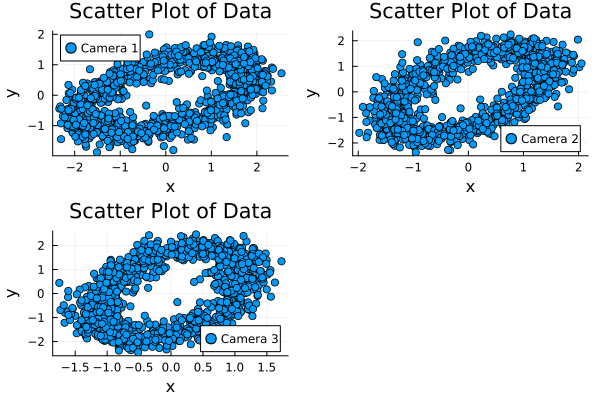

In [19]:
# Scatter Plot the 2-dim data
p1 = scatter(X[:, 1], X[:, 2], label="Camera 1")
p2 = scatter(X[:, 3], X[:, 4], label="Camera 2")
p3 = scatter(X[:, 5], X[:, 6], label="Camera 3")
plot(p1, p2, p3, title="Scatter Plot of Data", xlabel="x", ylabel="y")

Use PCA to analyze the data: 